# Part I

## I.1 Detected Problems

In [2]:
%matplotlib inline

import scipy.io as sio
import pandas as pd
#import matplotlib

matfn = 'DataA.mat'
matData = sio.loadmat(matfn)
data = pd.DataFrame(matData['fea'])
#print(data.shape)
#print (data.isnull().sum())

In [3]:
missing_df=data.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name', 'missing_count']
missing_df['filling_factor']=(data.shape[0]-missing_df['missing_count'])/data.shape[0]*100
missing_df.sort_values('filling_factor').reset_index(drop=True)

,column_name,missing_count,filling_factor
0,35,18999,0.005263
1,34,18999,0.005263
2,33,18999,0.005263
3,23,1323,93.036842
4,22,1323,93.036842
5,21,1323,93.036842
6,1,1188,93.747368
7,0,1187,93.752632
8,2,1187,93.752632
9,14,1050,94.473684


In [4]:
print(data.isnull().sum().sum())

124053


### Problem 1: Missing Values
For the above analysis we can find that this dataset has lots of missing values especially for features 33, 34 and 35. But for other features, the missing values are less than 4%.

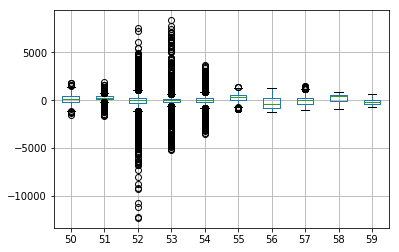

In [5]:
data.boxplot([50,51,52,53,54,55,56,57,58,59])

### Problem 2: Outliers
Above are the sample boxplot figures of features between 50 and 59. There are lots of outliers such as in feature 52 and 53. 

## I.2 Fixing the problems 

###  I.2.1 Fixing the missing values

Features 33, 34 and 35 have large amount of missing values, so just drop those three columns. For other features, the missing values are less than 4%, so we can replace the nan values with estimates calculated by EM algorithm.

In [6]:
data.drop(data.columns[[33, 34, 35]], axis=1, inplace=True)

In [7]:
import numpy as np

def get_estimate_value(column, num_items, threshold):
    '''
    --Get estimate by EM algorithm for each column in data
    initial estimate = 3
    Convergence threshold = 0.005
    '''
    u_mean = 3 #assume a random mean value for a column
    summ = column.sum() + (column.isnull().sum())*u_mean
    
    u_mean_temp = summ / num_items
    #threshold = 0.005
    while (abs(u_mean_temp - u_mean) > threshold):
        u_mean = u_mean_temp
        summ = column.sum() + (column.isnull().sum())*u_mean
        u_mean_temp = summ / num_items

    estimate_value = u_mean_temp
    return estimate_value

n = len(data)
threshold = 0.005
for i in data.columns:
    data[i] = data[i].replace(np.NaN, get_estimate_value(data[i], n, threshold))

In [8]:
print(data.isnull().sum().sum())

0


### I.2.2 Removing the outliers


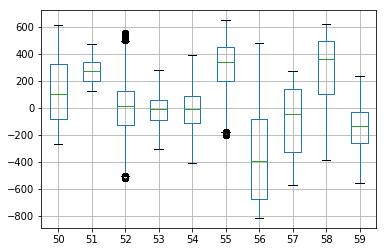

In [9]:
low = .15
high = .85
q = data.quantile([low, high])

filtA_df = data.apply(lambda x: x[(x > q.loc[low,x.name]) & 
                                    (x < q.loc[high,x.name])], axis=0)
filtA_df.boxplot([50,51,52,53,54,55,56,57,58,59])

The above sample figure is the boxplot figure after removing outliers. 

In [10]:
n = len(filtA_df)
filter_threshold = 0.005
for i in filtA_df.columns:
    filtA_df[i] = filtA_df[i].replace(np.NaN, get_estimate_value(filtA_df[i], n, threshold))
data = filtA_df
print(data.isnull().sum().sum())
print(data.shape)

0
(19000, 78)


## I.3 Normalization

In [11]:
import matplotlib.pyplot as plt  # For making visualaizations
import seaborn as sns # More visualization tools

from scipy.stats import zscore

feature1 = 9
feature2 = 24
# Min-max normalize
data_norm = (data - data.min()) / (data.max() - data.min())
# Zero-mean normalize
data_zero_norm = data.apply(zscore)
print(data_norm.shape)

(19000, 78)


Text(0.5,1,'Feature9 distribution after zero-mean normalization')

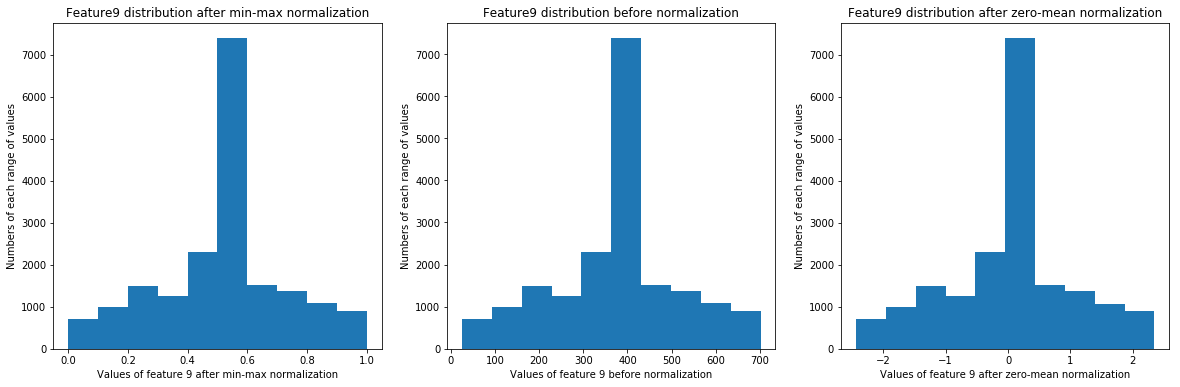

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.hist(data_norm[feature1].values)
ax1.set_xlabel('Values of feature '+str(feature1)+' after min-max normalization')
ax1.set_ylabel('Numbers of each range of values')
ax1.set_title('Feature'+str(feature1)+' distribution after min-max normalization')

ax2.hist(data[feature1].values)
ax2.set_xlabel('Values of feature '+str(feature1)+' before normalization')
ax2.set_ylabel('Numbers of each range of values')
ax2.set_title('Feature'+str(feature1)+' distribution before normalization')

ax3.hist(data_zero_norm[feature1].values)
ax3.set_xlabel('Values of feature '+str(feature1)+' after zero-mean normalization')
ax3.set_ylabel('Numbers of each range of values')
ax3.set_title('Feature'+str(feature1)+' distribution after zero-mean normalization')

Text(0.5,1,'Feature9 distribution after zero-mean normalization')

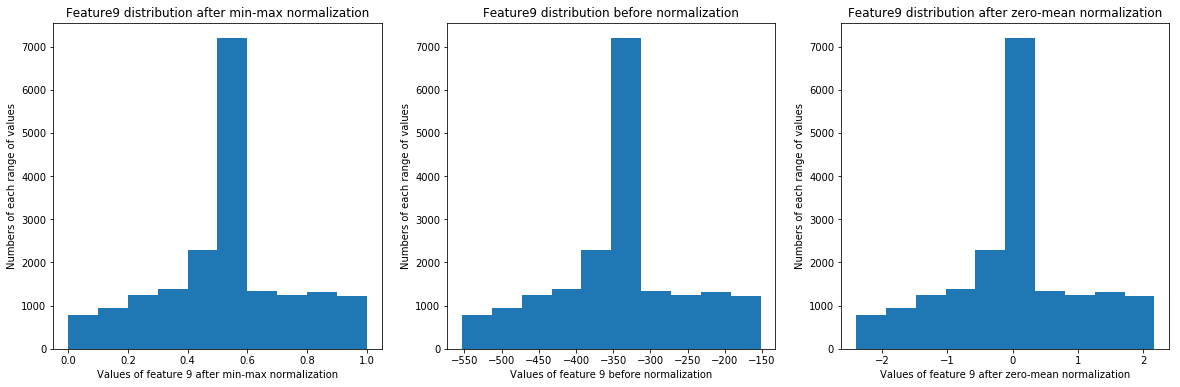

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.hist(data_norm[feature2].values)
ax1.set_xlabel('Values of feature '+str(feature1)+' after min-max normalization')
ax1.set_ylabel('Numbers of each range of values')
ax1.set_title('Feature'+str(feature1)+' distribution after min-max normalization')

ax2.hist(data[feature2].values)
ax2.set_xlabel('Values of feature '+str(feature1)+' before normalization')
ax2.set_ylabel('Numbers of each range of values')
ax2.set_title('Feature'+str(feature1)+' distribution before normalization')

ax3.hist(data_zero_norm[feature2].values)
ax3.set_xlabel('Values of feature '+str(feature1)+' after zero-mean normalization')
ax3.set_ylabel('Numbers of each range of values')
ax3.set_title('Feature'+str(feature1)+' distribution after zero-mean normalization')

## Comparing the results:
For machine learning methods, it is beneficial to do the normalization first. Before normaliztion, the range of features is quite large. After min-max normalization, the interval is between [0, 1]. This makes the values invariant to rigid displacement of coordinates. However, it may encounter an out-of-bounds error if a future input case for normalization falls outside of the original data range.

After z-score normalization, the scale is [-2.5, 2.5]. Positive means value is above the mean, Negative means it is below the mean. Data is modified so that it now has the aggregate properties of a standard normal distribution μ = 0 and σ = 1.

# Part II

## II.1 Eigenvalues and Eigenvectors of PCA

In [2]:
import scipy.io as sio
import pandas as pd
from sklearn.decomposition import PCA

matfn = 'DataB.mat'
matData = sio.loadmat(matfn)
data = pd.DataFrame(matData['fea'])

In [3]:
data=data.as_matrix()
pca=PCA()
reduced_X=pca.fit_transform(data)
print('eigenvalue:{}\n eigenvector:{}'.format(pca.explained_variance_, pca.components_))

eigenvalue:[  4.67242207e+05   2.78894146e+05   2.13480284e+05   2.05514154e+05
   1.71638869e+05   1.29473256e+05   1.13282522e+05   9.13665833e+04
   8.81948304e+04   7.26695964e+04   6.47973043e+04   5.91614589e+04
   5.71810362e+04   5.15388208e+04   4.71162983e+04   4.30116981e+04
   4.01681360e+04   3.92327232e+04   3.81662137e+04   3.44883896e+04
   3.25474987e+04   3.08116460e+04   2.87269206e+04   2.77117300e+04
   2.66864459e+04   2.59429468e+04   2.44575328e+04   2.37064782e+04
   2.32238894e+04   2.19475845e+04   2.14949943e+04   1.99553743e+04
   1.95307071e+04   1.77691867e+04   1.67857005e+04   1.63009352e+04
   1.61692889e+04   1.55764739e+04   1.45129452e+04   1.41356650e+04
   1.37490819e+04   1.31545707e+04   1.23464386e+04   1.19231480e+04
   1.17660533e+04   1.16006832e+04   1.13650854e+04   1.12916028e+04
   1.05749096e+04   1.00068073e+04   9.88224042e+03   9.42109813e+03
   9.06882290e+03   8.99328094e+03   8.78820190e+03   8.58885957e+03
   8.27499662e+03   7.8

## II.2 Plot the 2 dimensional representation

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = matData['fea']
y = matData['gnd']
y = y.flatten()#convert to 1d array

Text(0.5,1,'Principal Component Analysis (PCA)')

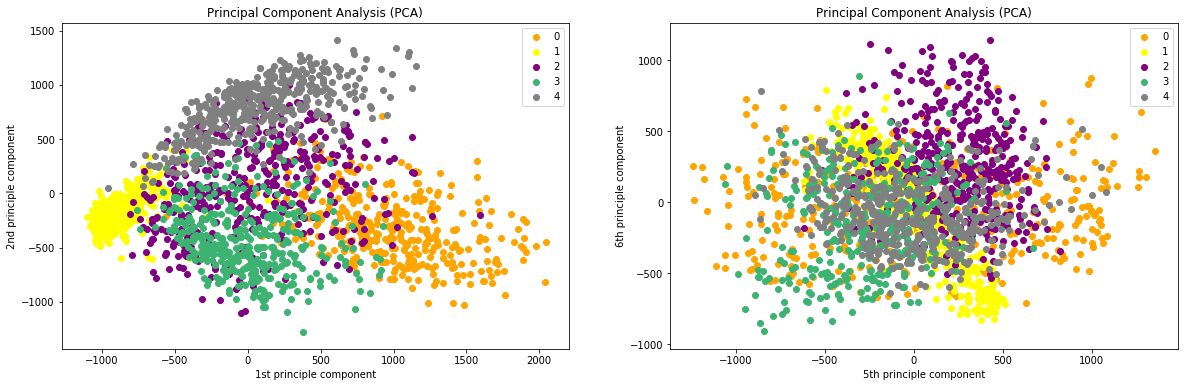

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

pca = PCA(n_components=6)
X_r = pca.fit(X).transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

data_0 = []
for i, label in enumerate(matData['gnd']):
    if label == 0:
        data_0.append(X_r[i].tolist())
        
data_0_array = np.asarray(data_0)
ax1.scatter(x=data_0_array[:,0], y=data_0_array[:,1], c= 'orange', label='0')
ax2.scatter(x=data_0_array[:,4], y=data_0_array[:,5], c= 'orange', label='0')

data_1 = []
for i, label in enumerate(matData['gnd']):
    if label == 1:
        data_1.append(X_r[i].tolist())
        
data_1_array = np.asarray(data_1)
ax1.scatter(x=data_1_array[:,0], y=data_1_array[:,1], c='yellow', label='1')
ax1.legend()
ax2.scatter(x=data_1_array[:,4], y=data_1_array[:,5], c='yellow', label='1')
ax2.legend()


data_2 = []
for i, label in enumerate(matData['gnd']):
    if label == 2:
        data_2.append(X_r[i].tolist())
        
data_2_array = np.asarray(data_2)
ax1.scatter(x=data_2_array[:,0], y=data_2_array[:,1], c='purple', label='2')
ax1.legend()
ax2.scatter(x=data_2_array[:,4], y=data_2_array[:,5], c='purple', label='2')
ax2.legend()

data_3 = []
for i, label in enumerate(matData['gnd']):
    if label == 3:
        data_3.append(X_r[i].tolist())
        
data_3_array = np.asarray(data_3)
ax1.scatter(x=data_3_array[:,0], y=data_3_array[:,1], c='mediumseagreen', label='3')
ax1.legend()
ax2.scatter(x=data_3_array[:,4], y=data_3_array[:,5], c='mediumseagreen', label='3')
ax2.legend()

data_4 = []
for i, label in enumerate(matData['gnd']):
    if label == 4:
        data_4.append(X_r[i].tolist())
        
data_4_array = np.asarray(data_4)
ax1.scatter(x=data_4_array[:,0], y=data_4_array[:,1], c='gray', label='4')
ax1.legend()
ax2.scatter(x=data_4_array[:,4], y=data_4_array[:,5], c='gray', label='4')
ax2.legend()

ax1.legend()
ax1.set_xlabel('1st principle component')
ax1.set_ylabel('2nd principle component')
ax1.set_title('Principal Component Analysis (PCA)')

ax2.legend()
ax2.set_xlabel('5th principle component')
ax2.set_ylabel('6th principle component')
ax2.set_title('Principal Component Analysis (PCA)')

## Analysis
Data is projected to a different coordinate after dimensional reduction by PCA. Based on these two figures, we can see that the ranges are a little bit different. Because the major information are concentrated on the first several principal components, the first and second components are more important than the 5th and 6th components. The within-class scatter in figure 1 is smaller than the scatter in figure 2. Therefore, it is much easier to classify classes based on the 1st and 2nd principle components.

## II.3  Naive Bayes Classifier for classification

In [5]:
'''This cell is for getting rm calculated from 2 diff dimensional data'''
def get_model_of_reducedX_PCA(matData, components=None):
    data = pd.DataFrame(matData['fea'])
    matrix_data = data.as_matrix()
    
    pca = PCA(components)
    reduced_X = pca.fit_transform(matrix_data)
    return pca


sum_engineValue_original = get_model_of_reducedX_PCA(matData).explained_variance_.sum()
def get_rm(matData, components, sum_engineValue_original):    
    model_pca = get_model_of_reducedX_PCA(matData, components)
    sum_engineValue_certainC = model_pca.explained_variance_.sum()
    rm = sum_engineValue_certainC / sum_engineValue_original
    return rm
#print get_rm(matData, 200, sum_engineValue_original)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def get_classification_error(matData, components):
    pca = PCA(components)
    x_train = pca.fit_transform(pd.DataFrame(matData['fea']).as_matrix())
    y_train = matData['gnd'].flatten()# convert nD_Array to 1D_array
    x_test = x_train
    
    gnb = GaussianNB()
    y_pred = gnb.fit(x_train, y_train).predict(x_test)
    #clf_error = y_pred - y_train
    classfication_error =1 - (accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size))
    return classfication_error
#print get_classification_error(matData, 2)

In [7]:
sets = [2, 4, 10, 30, 60, 200, 500, 784]
rms = []
clf_erros = []
for components in sets:
    rm = get_rm(matData, components, sum_engineValue_original)
    rms.append(rm)
    clf_erro = get_classification_error(matData, components)
    clf_erros.append(clf_erro)

Text(0,0.5,'classification error')

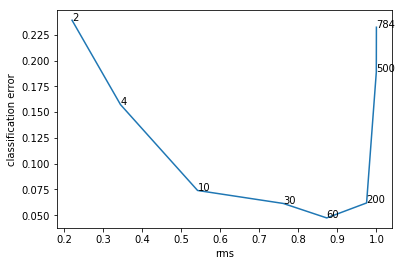

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(rms, clf_erros)

for i, PCA_components in enumerate(sets):
    plt.annotate(str(PCA_components), (rms[i], clf_erros[i]))
    
plt.xlabel('rms')
plt.ylabel('classification error')

From the above results, we can see that the classfication accuracy improves with more principal components included. We get the highest accuracy with 60 principal components in total. After that, if we increase the components, the accuracy will decrease. Because this is PCA, the major informations are concentrated in the first several pricipal components. The components behind may not contribute to the classification or they may even disturb it.

## II.4 Linear Discriminant Analysis (LDA)
#### References:
[Intro to Dimensionality Reduction](https://www.kaggle.com/lilukaggle/interactive-intro-to-dimensionality-reduction)
<br>
[PCA and proportion of variance explained](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)

Text(0,0.5,'2nd principal component')

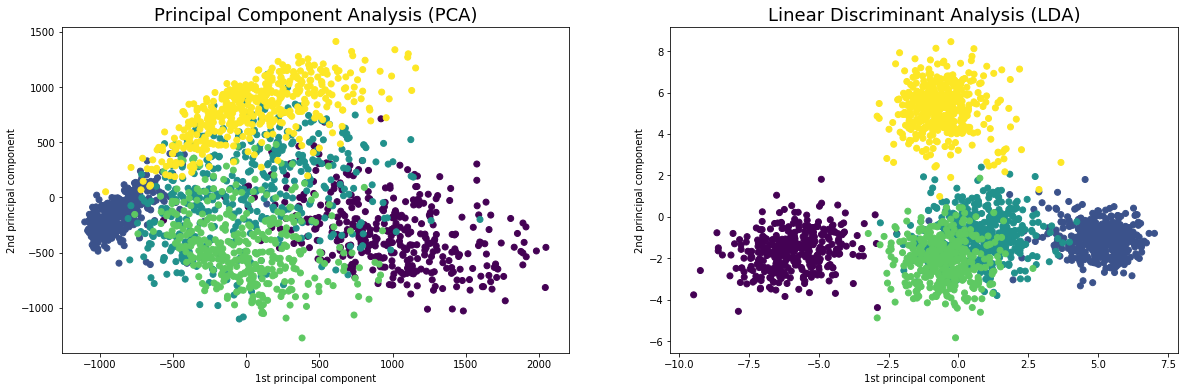

In [23]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))# plotting images side by side
s_plot = ax1.scatter(x=X_r[:,0], y=X_r[:,1], c=y)
ax1.set_title('Principal Component Analysis (PCA)', fontsize=18)
ax1.set_xlabel('1st principal component')
ax1.set_ylabel('2nd principal component')

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

s_plot = ax2.scatter(x=X_r2[:,0], y=X_r2[:,1], c=y)
ax2.set_title('Linear Discriminant Analysis (LDA)', fontsize=18)
ax2.set_xlabel('1st principal component')
ax2.set_ylabel('2nd principal component')

### Explanation
From the above scatter plot, we can see that points from different classes are projected to different areas. The data points are more clearly clustered when using Linear Discriminant Analysis (LDA). This is because LDA is a supervised method taking class labels into account. It tries to maximize between-class scatter and minimize within-class scatter.

### Comparing LDA with PCA
On the other hand, in PCA's scatter plot, data points from different classes are not clearly separated. The distances between each point are larger than those in LDA. This is because PCA tries to maximize the variance of data in new subspace, during which the method is trying to find directions that contain the largest spread of data points or information(variance) relative to all data points present. Also, PCA is an unsupervised method which ignores class information. Therefore could not separate different classes.

# Part III

## III.1 Locally Linear Embedding (LLE)
reference:
http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
%matplotlib inline
from sklearn import manifold
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
matfn = 'DataB.mat'
matData = sio.loadmat(matfn)
data = pd.DataFrame(matData['fea'])
X = matData['fea']
y = matData['gnd']
y = y.flatten()#convert to 1d array

In [2]:
data_3 = []
for i, label in enumerate(matData['gnd']):
    if label == 3:
        data_3.append(matData['fea'][i].tolist())

In [3]:
data_3_array = np.asarray(data_3)
data_3_array.shape
new = np.reshape(data_3_array, (398, 28, 28))
new.shape

(398, 28, 28)

Text(0.5,1,'1st and 2nd dimensions of digit 3 after LLE ')

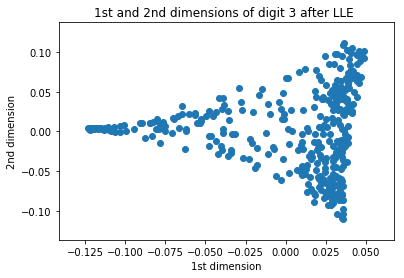

In [5]:
from scipy.spatial import distance
data_3 = []
for i, label in enumerate(matData['gnd']):
    if label == 3:
        data_3.append(matData['fea'][i].tolist())
        
data_3_array = np.asarray(data_3)
data_3_array.shape
new_data_3 = np.reshape(data_3_array, (398, 28, 28))


new_data_3_lle, err=manifold.locally_linear_embedding(data_3, n_neighbors=5, n_components=4)
plt.scatter(new_data_3_lle[:, 0], new_data_3_lle[:, 1])
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.title('1st and 2nd dimensions of digit 3 after LLE ')

In [7]:
df_label = pd.DataFrame(y)
df_label_3 = df_label[df_label[0] == 3]

df_train = pd.DataFrame(X)
start = df_label_3.index[0]
end = df_label_3.index[-1]
df_train_3 = df_train[start:end+1]

In [8]:
X_data = df_train_3.as_matrix()
y = df_label_3.as_matrix()

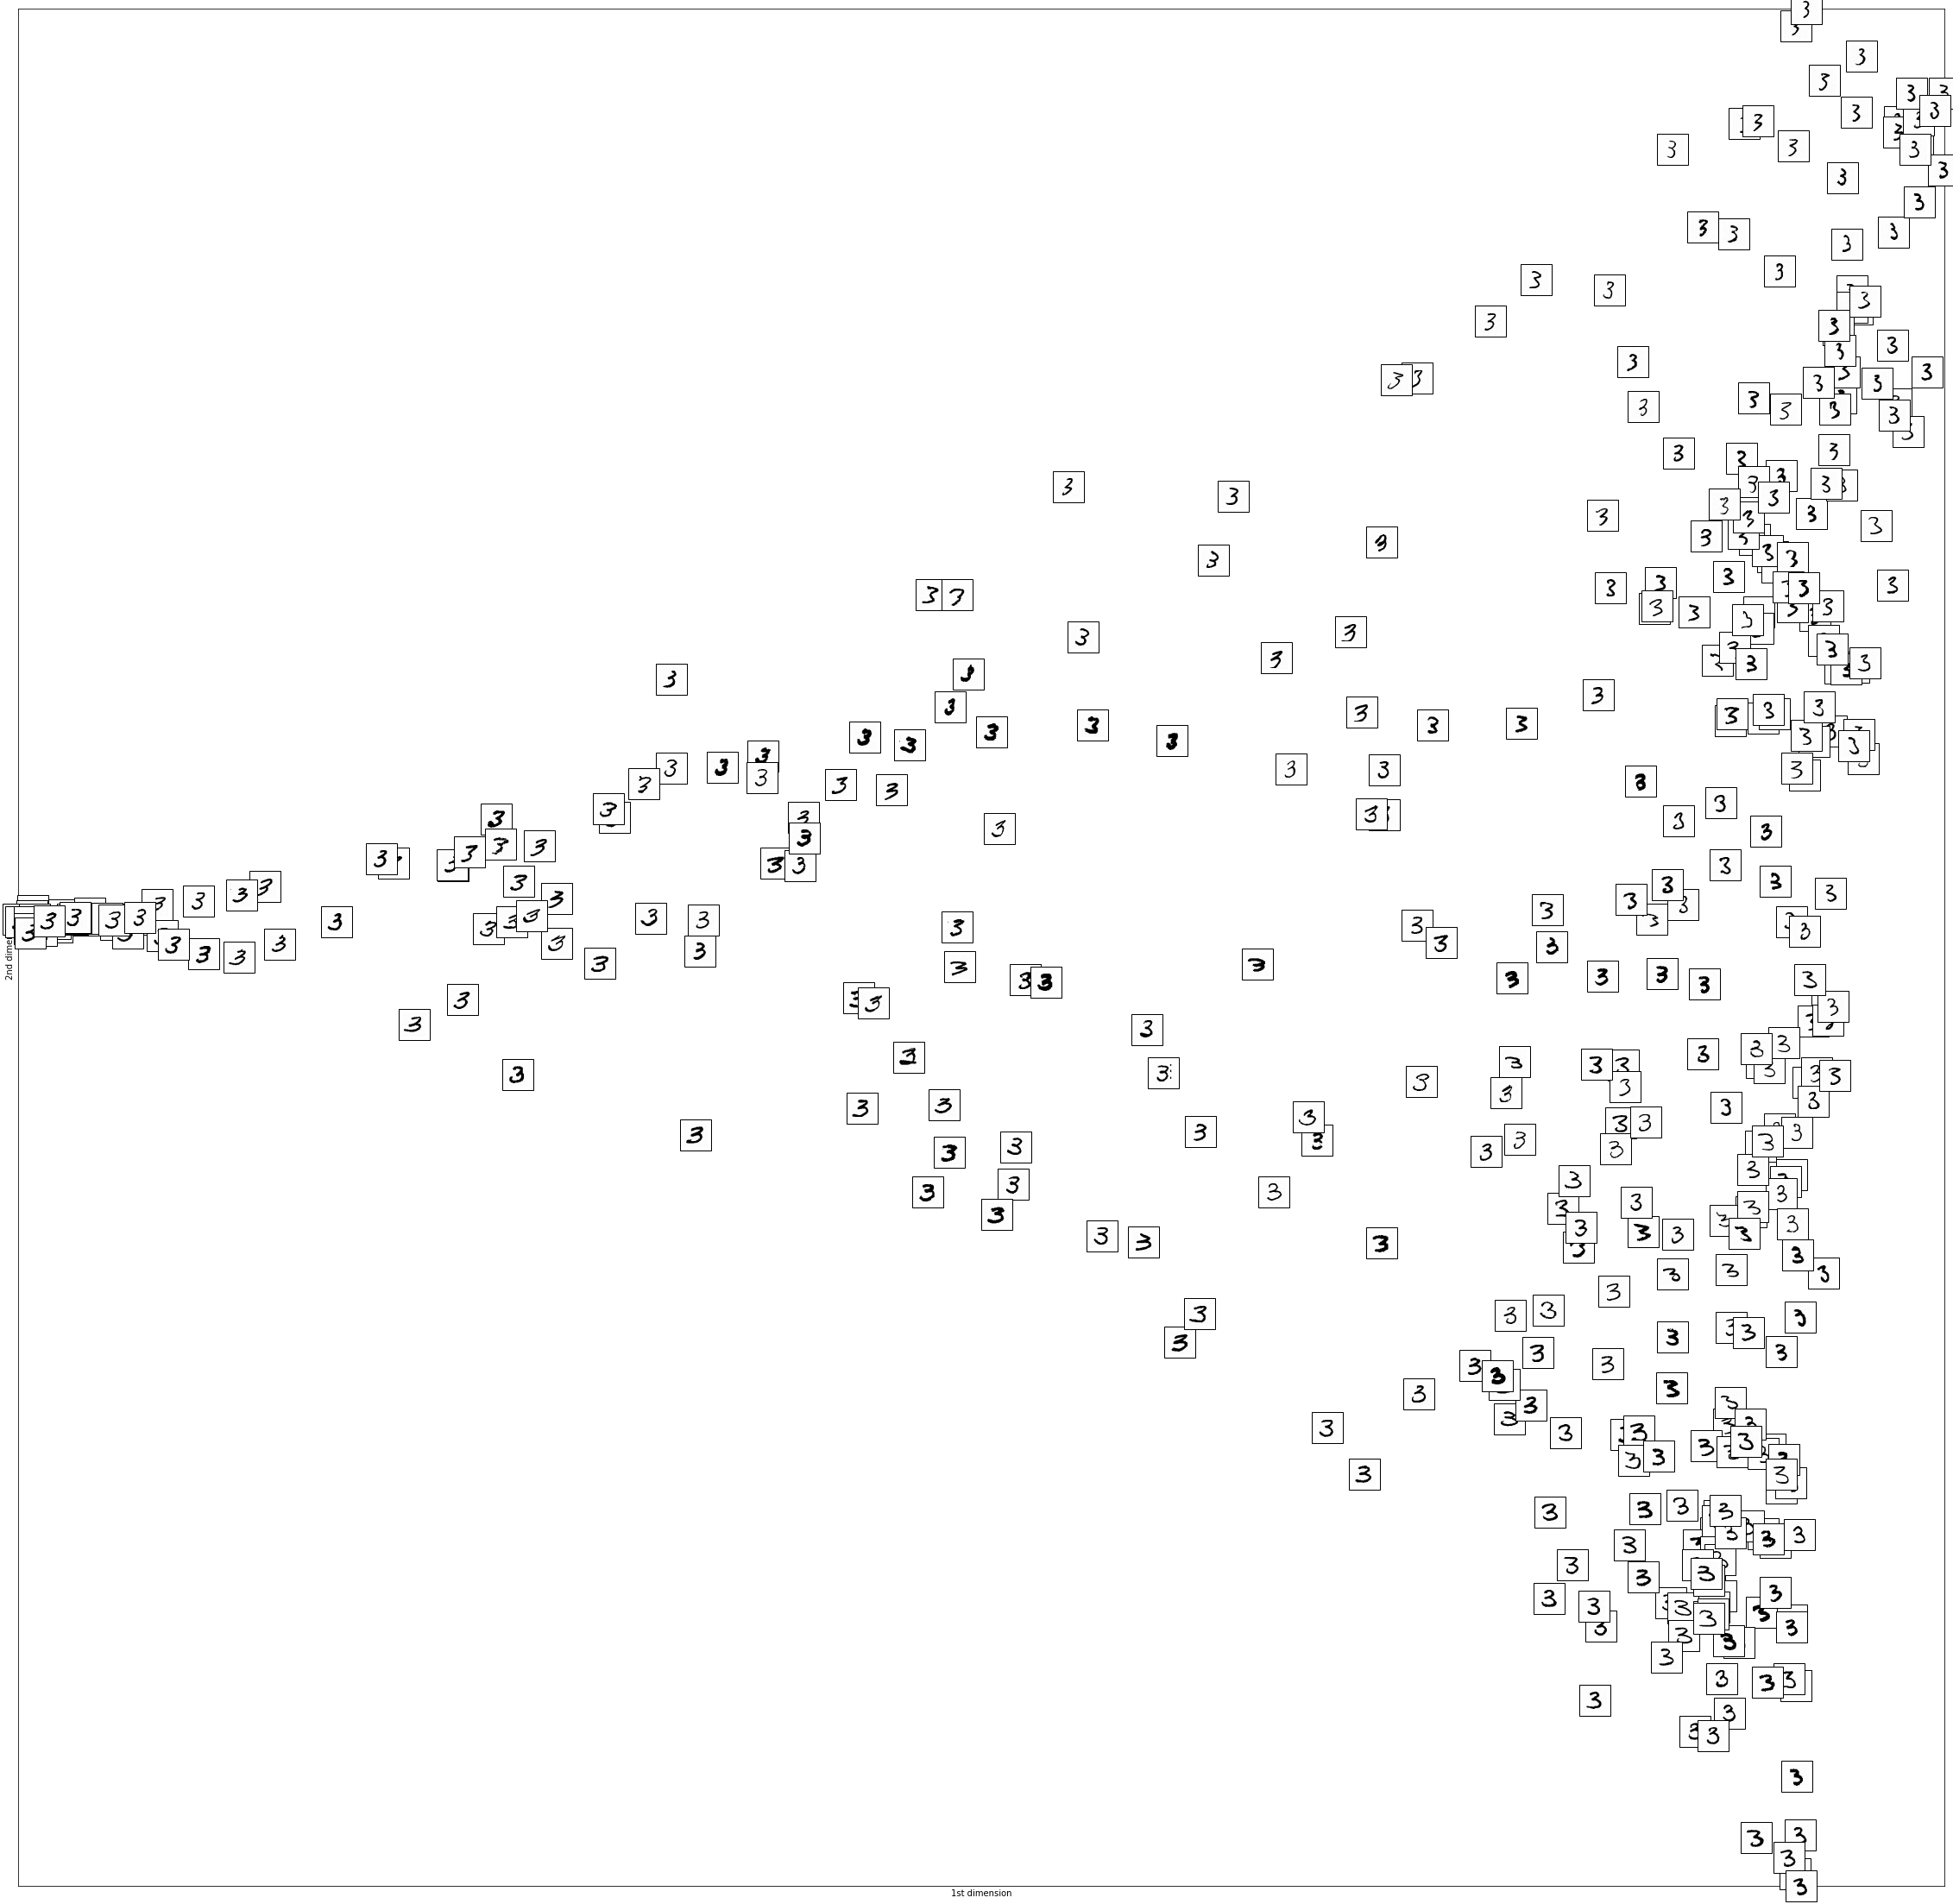

In [13]:
from matplotlib import offsetbox
def plot_embedding(X):
    x_min, x_max = np.min(X,0), np.max(X,0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure(figsize=(40,40))
    ax = plt.subplot(111)
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])  # just initialize something big
        for i in range(y.shape[0]):
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X_data[i].reshape(28,28), cmap=plt.cm.gray_r),X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    plt.xlabel('1st dimension')
    plt.ylabel('2nd dimension')
    
plot_embedding(pd.DataFrame(new_data_3_lle).iloc[:,:2].as_matrix())

In [10]:
dst = distance.cdist(np.atleast_2d(new_data_3_lle), np.atleast_2d(new_data_3_lle), 'euclidean')
print(dst)

[[ 0.          0.16021466  0.17422879 ...,  0.14922772  0.13108845
   0.14734254]
 [ 0.16021466  0.          0.17073387 ...,  0.02283453  0.05901139
   0.03597131]
 [ 0.17422879  0.17073387  0.         ...,  0.14803632  0.11390767
   0.13476467]
 ..., 
 [ 0.14922772  0.02283453  0.14803632 ...,  0.          0.03644222
   0.01340088]
 [ 0.13108845  0.05901139  0.11390767 ...,  0.03644222  0.          0.02501894]
 [ 0.14734254  0.03597131  0.13476467 ...,  0.01340088  0.02501894  0.        ]]


### Analysis
Locally Linear Embedding is able to capture local properties by Euclidean geometry. The above matrix is the Euclidean distance which calculates the within-class scatter of class of images 3 after projection. 

## III.2 ISOMAP

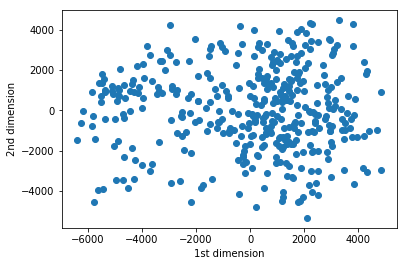

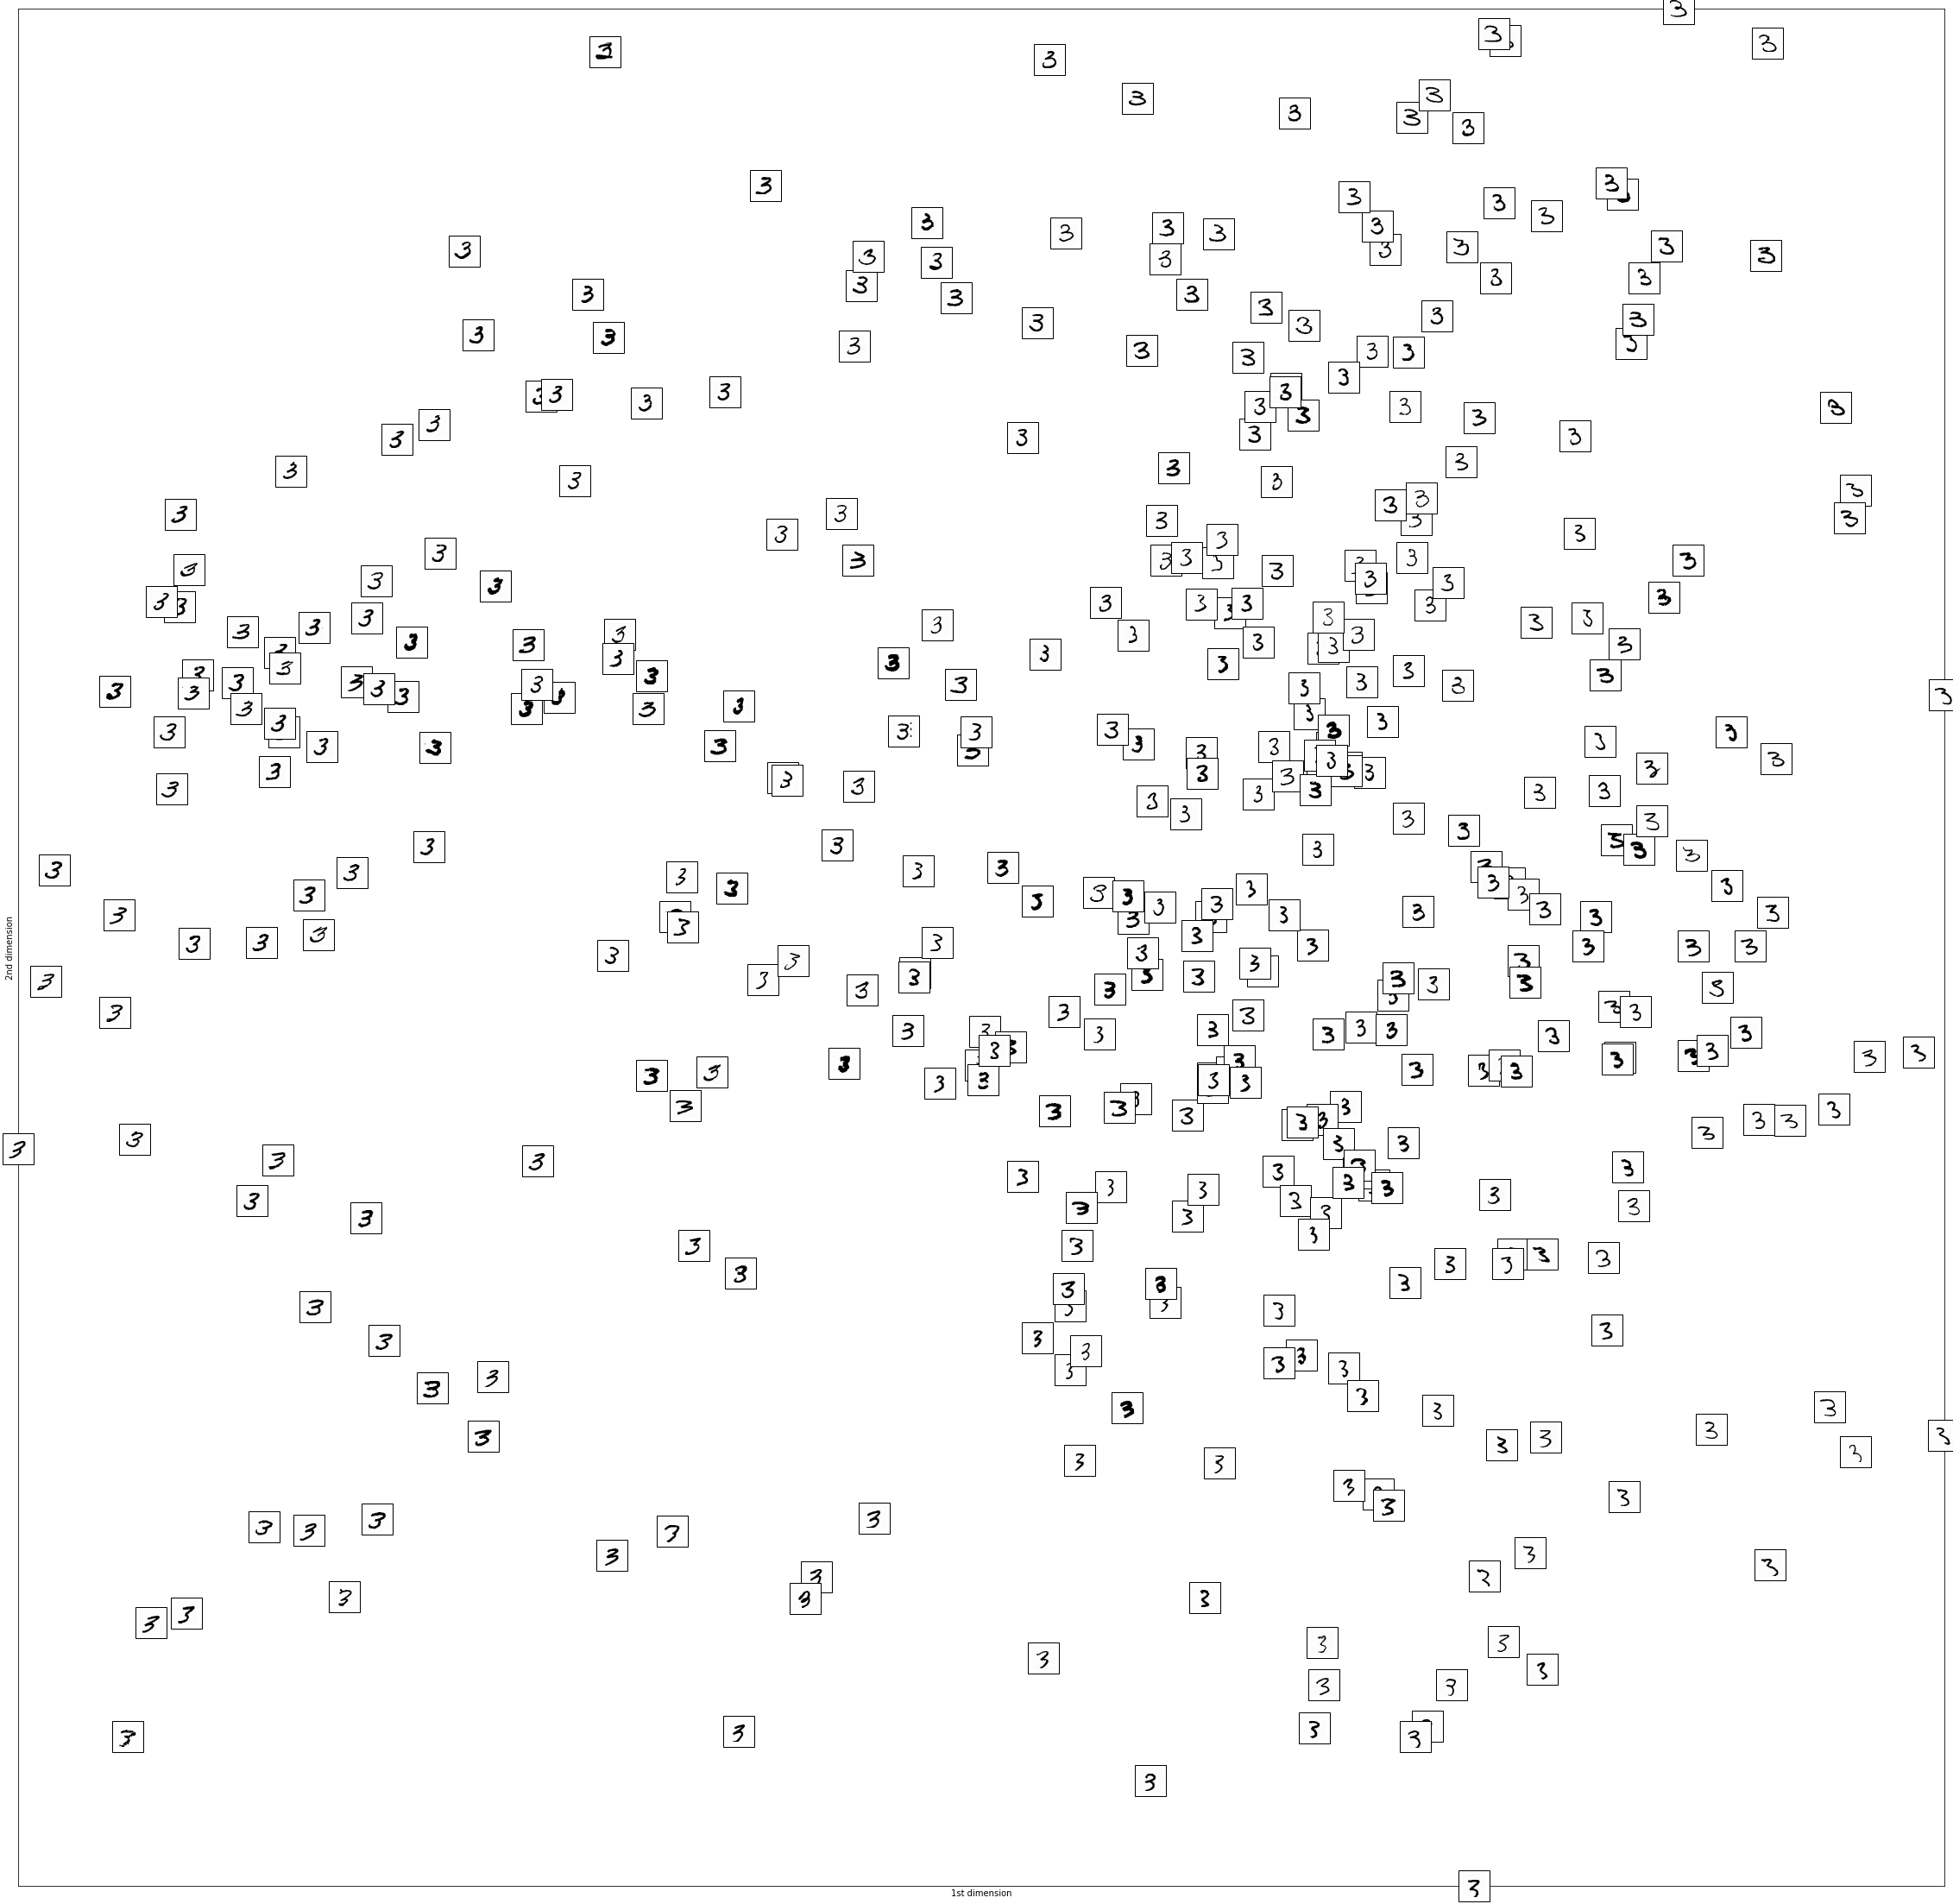

In [14]:
data_isomap=manifold.Isomap(n_neighbors=5, n_components=4)
data_isomap.fit(data_3)
data_3_isomap_new=data_isomap.transform(data_3)
plt.scatter(data_3_isomap_new[:, 0], data_3_isomap_new[:, 1])
plt.title=('digit 3 distribution after Isomap')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.show()

plot_embedding(pd.DataFrame(data_3_isomap_new).iloc[:,:2].as_matrix())

### Comparison
for Isomap, it does not do better than Locally Linear Embedding in terms of minimizing the within-class scatter. The patterns are found globally based.

## III.3 Naive Bayes Classifier for classification

average accuracy for LLE is: 0.901756180187
average accuracy for Isomap is: 0.864308253735
average accuracy for PCA is: 0.816359669667
average accuracy for LDA is: 0.956082750439


Text(0,0.5,'accuracy (LDA)')

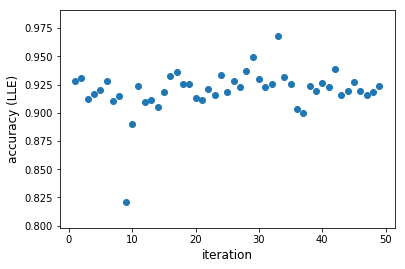

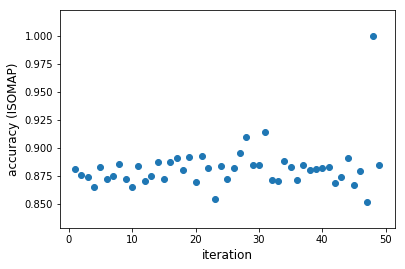

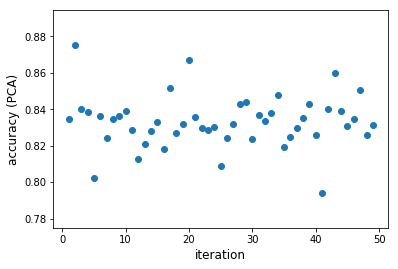

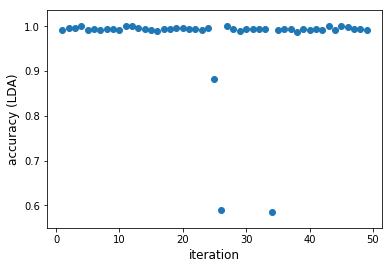

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import random
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = matData['gnd'].flatten()
#x=np.asmatrix(x)

def retrain_multiple_iteration(a, b, iterationNum):
    i=1
    x_lable=[]
    acc=[]
    while (i<iterationNum):
        x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=random.uniform(0, 1))
        gnb = GaussianNB()
        y_pred = gnb.fit(x_train, y_train).predict(x_test)
        score=accuracy_score(y_test, y_pred, normalize = True)
        acc.append(score)
        i += 1
        x_lable.append(i)
    
    average_accuracy = sum(acc) / i
    return acc

#LLE
x_lle, err = manifold.locally_linear_embedding(data, n_neighbors=5, n_components=4)
x_lle_accuracy = retrain_multiple_iteration(x_lle, y, 50)
lle_average_accuracy = sum(x_lle_accuracy) / 50
print("average accuracy for LLE is:", lle_average_accuracy)
fig, ax1 = plt.subplots()
s_plot = ax1.scatter(x=range(1,50), y=x_lle_accuracy)
ax1.set_xlabel('iteration', fontsize=12)
ax1.set_ylabel('accuracy (LLE)', fontsize=12)

#Isomap
data_isomap = manifold.Isomap(n_neighbors=5, n_components=4)
data_isomap.fit(data)
x_isomap = data_isomap.transform(data)
x_isomap_accuracy = retrain_multiple_iteration(x_isomap, y, 50)
isomap_average_accuracy = sum(x_isomap_accuracy) / 50
print("average accuracy for Isomap is:", isomap_average_accuracy)
fig, ax2 = plt.subplots()
s_plot = ax2.scatter(x=range(1,50), y=x_isomap_accuracy)
ax2.set_xlabel('iteration', fontsize=12)
ax2.set_ylabel('accuracy (ISOMAP)', fontsize=12)

#PCA
pca = PCA(n_components=4)
x_pca = pca.fit(data).transform(data)
x_pca_accuracy = retrain_multiple_iteration(x_pca, y, 50)
pca_average_accuracy = sum(x_pca_accuracy) / 50
print("average accuracy for PCA is:", pca_average_accuracy)
fig, ax3 = plt.subplots()
s_plot = ax3.scatter(x=range(1,50), y=x_pca_accuracy)
ax3.set_xlabel('iteration', fontsize=12)
ax3.set_ylabel('accuracy (PCA)', fontsize=12)

#LDA
lda = LinearDiscriminantAnalysis(n_components=4)
x_lda = lda.fit(X, y).transform(X)
x_lda_accuracy = retrain_multiple_iteration(x_lda, y, 50)
lda_average_accuracy = sum(x_lda_accuracy) / 50
print("average accuracy for LDA is:", lda_average_accuracy)
fig, ax4 = plt.subplots()
s_plot = ax4.scatter(x=range(1,50), y=x_lda_accuracy)
ax4.set_xlabel('iteration', fontsize=12)
ax4.set_ylabel('accuracy (LDA)', fontsize=12)

### Comparison
The classifier is trained with 50 iterations, it is clear that the accuracy doesn't improve a lot with the increasing of iteration. Therefore, 50 iterations are sufficient to train it. LDA performs the best while PCA gets the worst result. 